In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 5 

In [2]:
# Define the potential
def LJ_potential(x):
    return 4 * 10 * ((1 / x) ** 12 - (1 / x) ** 6)

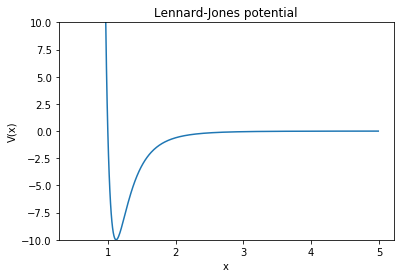

In [10]:
# plot the potential
x = np.arange(0.5, 5, 0.01)
V = LJ_potential(x)
plt.plot(x, V)
plt.ylim(-10,10)
plt.title('Lennard-Jones potential')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()

<font size = 4 color = black face = "Times New Roman">From this figure, we are easy to know that the minimum of the potential in (1,1.5). In this problem, I'd like to use the function numpy.argmin() to find the matching point.

In [12]:
#Intialize wave function
def initialize_psi(N):
    psi = np.zeros(N)
    psi[1] = 1e-3  # integration from left to right
    psi[N-2] = 1e-3 # integration from right to left
    
    return psi

In [23]:
#Define LJ_matching method
def LJ_matching(n = 0, E = 0, dE = 0.1):
    # n is energy level
    # initial guess of energy E, increment dE

    x = np.arange(0.5, 5, 0.01)
    N = len(x)

    psi = initialize_psi(N)

    tol = 0.5e-7 #check if wavefunction converges

    # initialize last_diverge which keeps tracks of the direction of the divergin trned
    last_diverge = 0 # we don't kow this direction a priori

    dx = 0.01
    dx2 = dx * dx
    
    matching_index = np.argmin(LJ_potential(x)) # Find the matching point's index

    while True:
        # integration from left to right
        for i in range(2,matching_index+1):
            psi[i] = 2*psi[i-1] - psi[i-2] - 2 * (E - LJ_potential(x[i-1])) * psi[i-1] * dx2
                 
        psi_left = psi[matching_index]   
        
        for i in range(N-3,matching_index-1,-1):
            psi[i] = 2*psi[i+1] - psi[i+2] - 2 * (E - LJ_potential(x[i+1])) * psi[i+1] * dx2
            
               
        if abs(dE) < tol:
            break        
                    
        psi_right = psi[matching_index] 
        psi[matching_index::] = psi[matching_index::] * psi_left / psi_right # wave function continues
        # three-point forward difference formula
        deri_psi_right = -3*psi[matching_index] + 4*psi[matching_index+1] - psi[matching_index+2] 
        # three-point backward difference formula
        deri_psi_left = 3*psi[matching_index] - 4*psi[matching_index-1] + psi[matching_index-2]

        dif = abs(deri_psi_right) - abs(deri_psi_left)
        if  dif * last_diverge < 0:
            dE = -dE / 2
        last_diverge = np.sign(dif)
        E = E + dE
        
    psi = psi / np.sqrt(np.sum(psi * psi)) # normalisation
    
    return E,x,psi

In [34]:
def LJ_matching_app():
    
    # plot the lowest four states

    #initial plot
    fig = plt.figure(figsize=(10,7))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$')
    plt.grid('on')
    plt.axhline() 

    # initialize first guess
    E_init = -5
    DeltaE = 0.05

    for n in range(0,5):
        
        E,x,psi = LJ_matching(n,E_init)
        plt.plot(x,psi,label='E={:.3f}'.format(E))
        print('E = {:.3f}, normalizatoin = {:.5f}'.format(E,np.sum(psi*psi)))
                
        E_init = E + DeltaE

    plt.legend()
    plt.title('Lennard-Jones wavefunction')

E = -1.890, normalizatoin = 1.00000
E = 0.221, normalizatoin = 1.00000
E = 0.398, normalizatoin = 1.00000
E = 1.228, normalizatoin = 1.00000
E = 1.616, normalizatoin = 1.00000


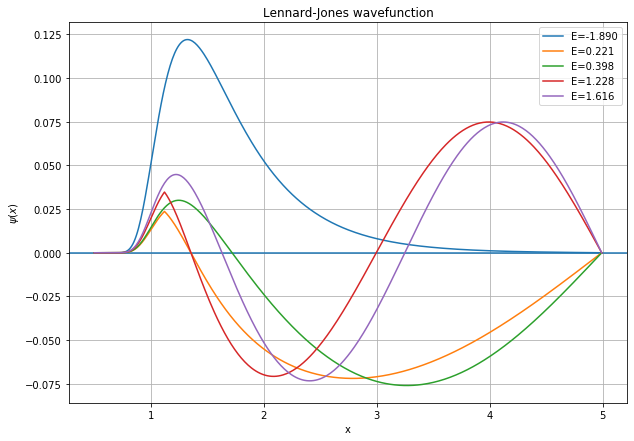

In [35]:
if __name__ == '__main__':
    LJ_matching_app()

<font size = 4 color = black face = "Times New Roman">The energy eigenvalues for ground state is $E = -1.890$, and the wavefunction we have shown above. And a few excited states have also been shown .

### Problem 8

<font size = 4 color = black face = "Times New Roman">We can use two-dimensional vectors to represent the coordinates of each dart. And I'm going to draw the corresponding graph to show you my result.

In [3]:
N = 100000
# Generates positions of dart.
dart_positions = np.random.rand(N, 2)

In [4]:
# Get the distance between each dart and origin
distance = np.linalg.norm(dart_positions,axis = 1)

In [5]:
# The number of darts that insder the circle for N = 1,2,3... 10000
inside = np.cumsum(distance < 1)

In [6]:
numbers = np.arange(1, N+1, 1)

In [7]:
# calculate pi
calculated_pi = 4 * inside / numbers
pi = np.pi

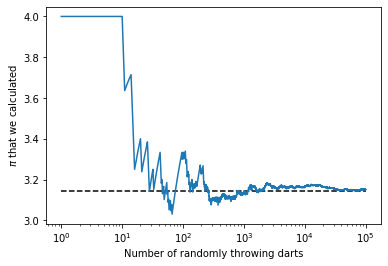

In [8]:
fig,ax = plt.subplots()
plt.semilogx(numbers, calculated_pi)
ax.hlines(y = np.pi, xmin = 1, xmax = N+1, linestyle='--') 
plt.xlabel('Number of randomly throwing darts')
plt.ylabel(r'$\pi$ that we calculated')
plt.show()

<font size = 4 color = black face = "Times New Roman">Hence we have gotten the right value of $\pi$, when N is large enough.